In [12]:
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=NOURA\SQLEXPRESS;'
    'DATABASE=shopping_trends;'
    'Trusted_Connection=yes;'
)

In [3]:
conn = pyodbc.connect(conn_str)

In [4]:
conn = pyodbc.connect(conn_str)

query = "SELECT * FROM dbo.shopping_trends"
df = pd.read_sql(query, conn)

df

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [6]:
df.describe()

,Customer_ID,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
(df.isnull().sum().sort_values()/len(df))*100

Customer_ID                 0.0
Age                         0.0
Gender                      0.0
Item_Purchased              0.0
Category                    0.0
Purchase_Amount_USD         0.0
Location                    0.0
Size                        0.0
Color                       0.0
Season                      0.0
Review_Rating               0.0
Subscription_Status         0.0
Payment_Method              0.0
Shipping_Type               0.0
Discount_Applied            0.0
Promo_Code_Used             0.0
Previous_Purchases          0.0
Preferred_Payment_Method    0.0
Frequency_of_Purchases      0.0
dtype: float64

In [11]:
num_col = [i for i in df.columns if df[i].dtypes != 'object']

cat_col = [i for i in df.columns if df[i].dtypes == 'object']

checking for outliers

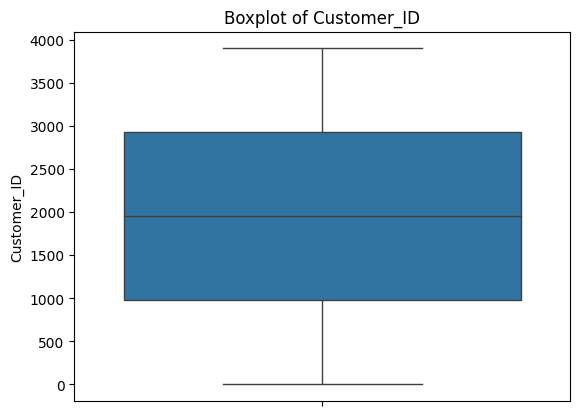

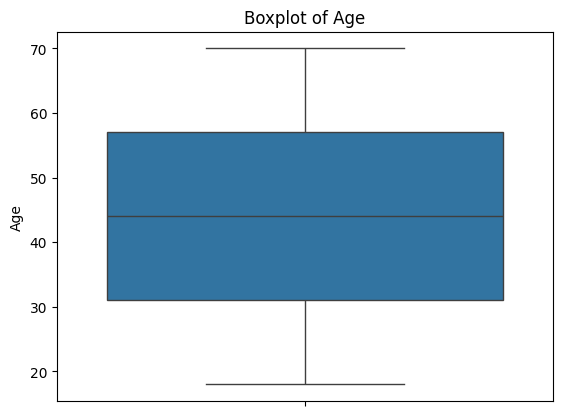

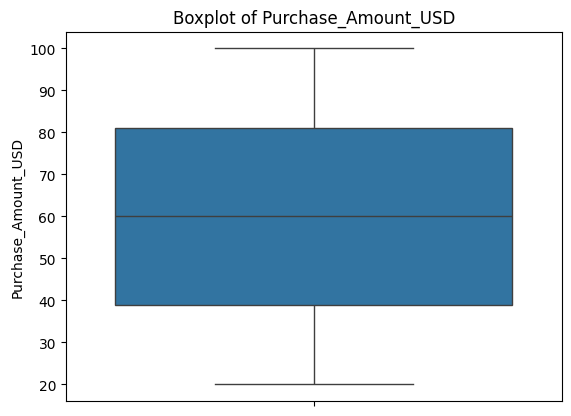

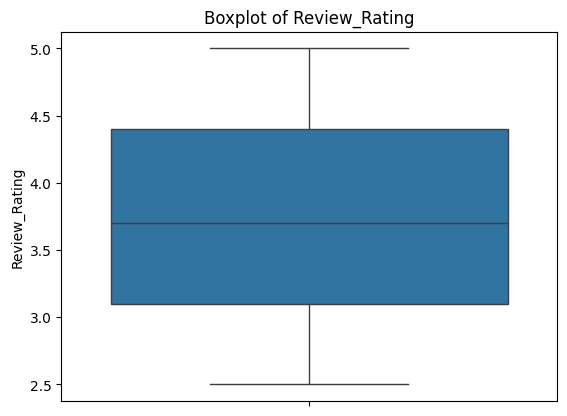

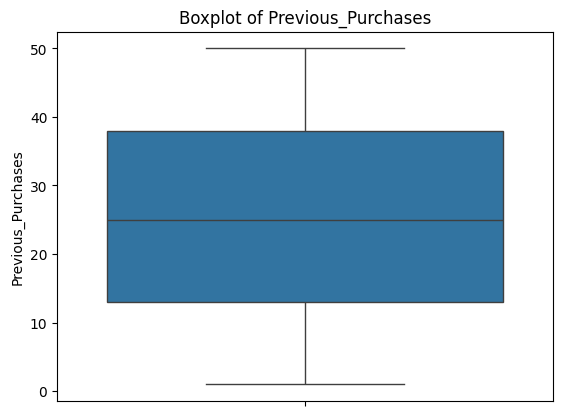

In [13]:
for col in num_col:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [33]:
fig=px.histogram(df,y='Purchase_Amount_USD',x='Location',color='Gender')
fig.show()

montana has the largest no. of purchase amount

In [35]:
fig=px.histogram(df,y='Purchase_Amount_USD',x='Payment_Method',color='Gender')
fig.show()

they tend to pay with credit card

In [42]:
fig=px.bar(df,y='Purchase_Amount_USD',x='Promo_Code_Used',color='Gender')
fig.show()

mostly males use promo code

In [50]:
fig=px.histogram(df,y='Purchase_Amount_USD',x='Location',color='Category')
fig.show()

distribution of categories among countries

In [57]:
fig=px.bar(df,y='Review_Rating',x='Category',color='Gender')
fig.show()

clothing have higher ratings

In [68]:
fig=px.pie(df,names='Category', title='Categories')
fig.show()

In [69]:
fig=px.pie(df,names='Subscription_Status', title='Subscription Status')
fig.show()

In [70]:
fig=px.pie(df,names='Shipping_Type', title='Shipping Type')
fig.show()

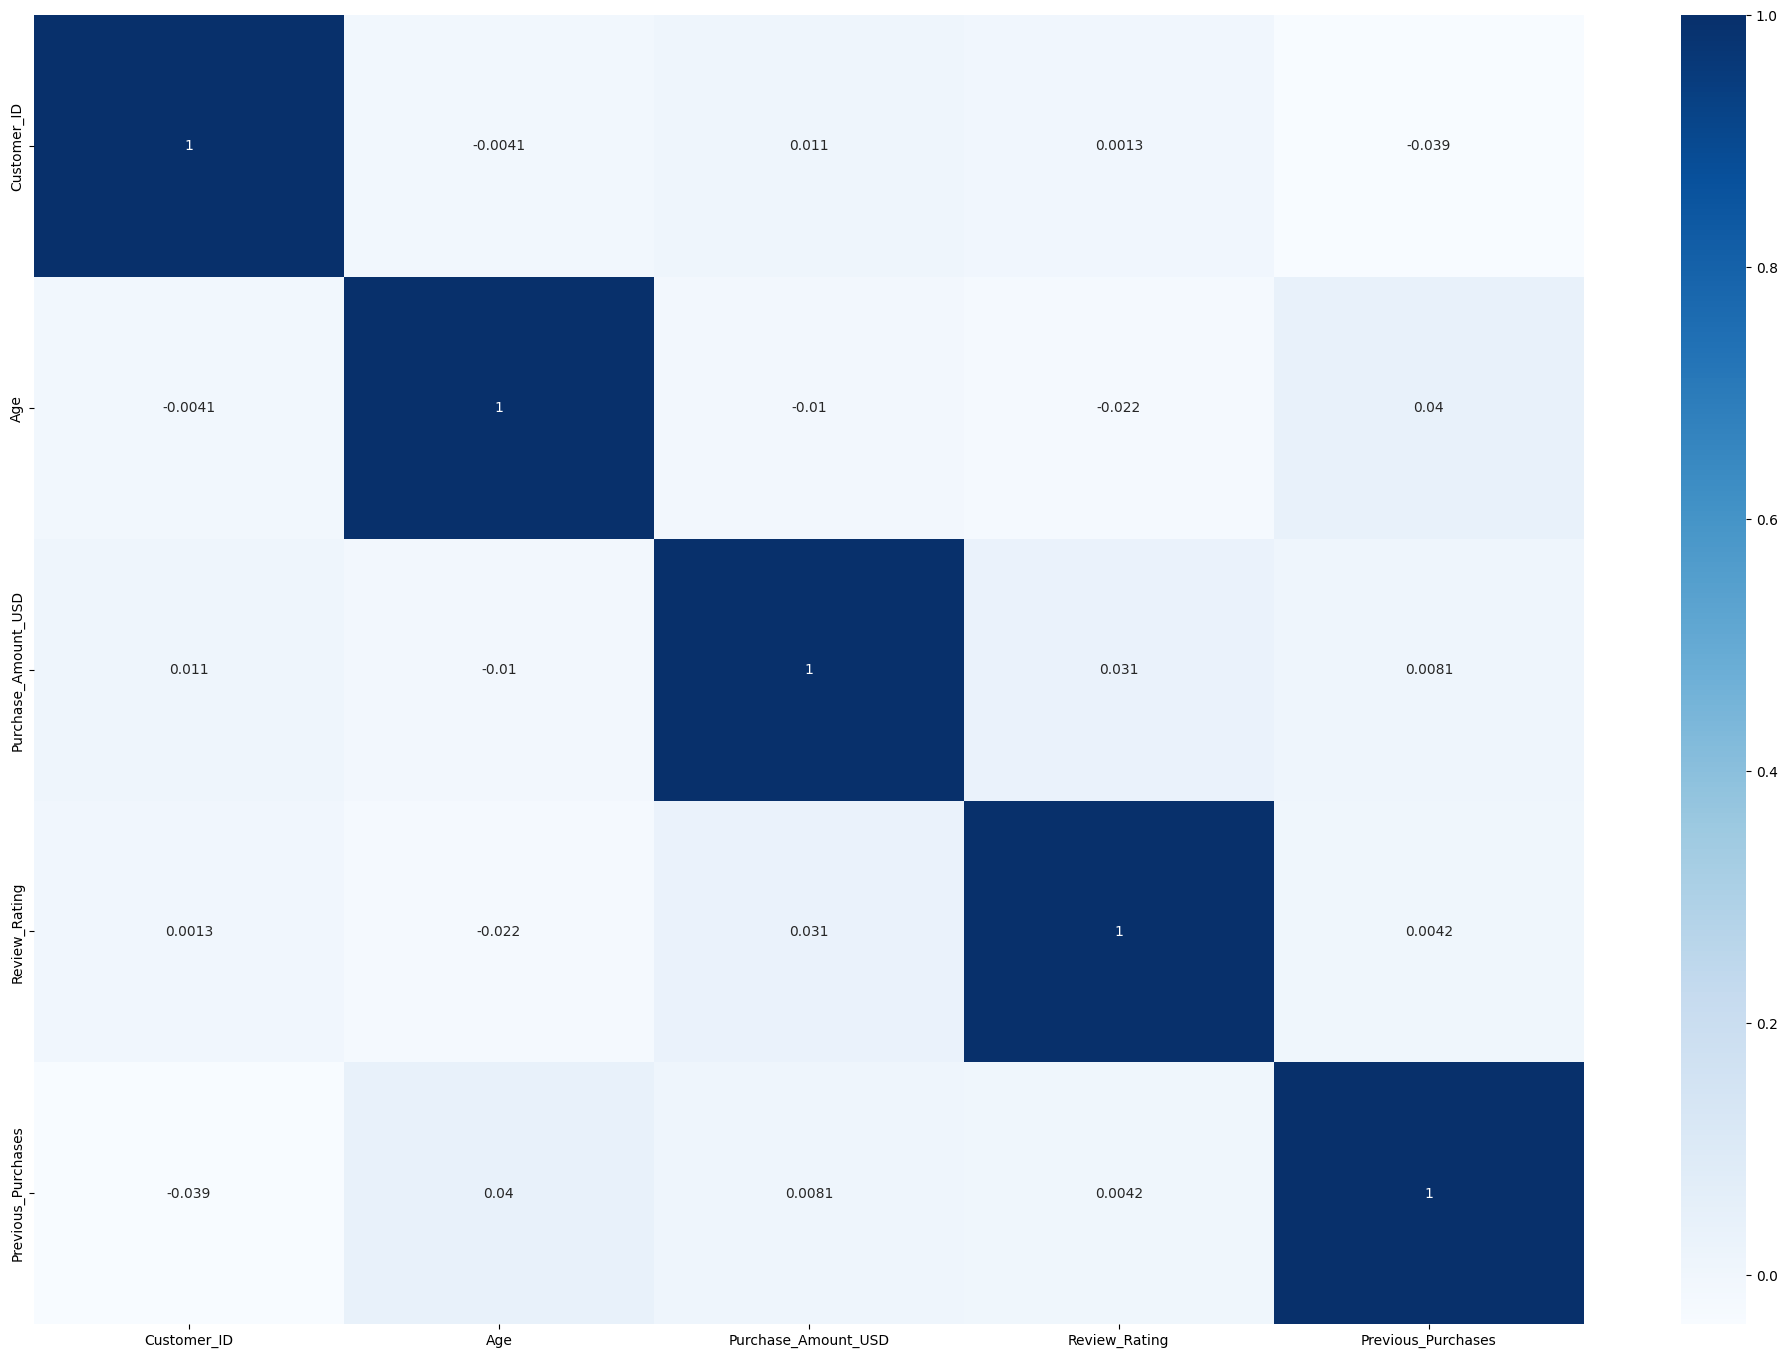

In [66]:
correlation_matrix =df[num_col].corr()
plt.figure(figsize=(25,17))
sns.heatmap(correlation_matrix , annot= True , cmap='Blues')
plt.show()